<a href="https://colab.research.google.com/github/ivoian/data-driven-logistics/blob/main/simula%C3%A7%C3%A3o_dados_eficiencia_entregas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)

# Parâmetros
num_registros = 300
veiculos = ['Caminhão Leve', 'Van', 'Moto']
causas_atraso = ['Trânsito', 'Erro de Rota', 'Problema Técnico', 'Clima', 'Nenhuma']

# Geração dos dados
dados = {
    'ID_Entrega': range(1, num_registros + 1),
    'Veiculo': np.random.choice(veiculos, num_registros),
    'Tempo_Separacao': np.random.normal(loc=25, scale=5, size=num_registros).round(1),
    'Tempo_Carregamento': np.random.normal(loc=15, scale=4, size=num_registros).round(1),
    'Tempo_Entrega': np.random.normal(loc=45, scale=10, size=num_registros).round(1),
    'Tempo_Parado': np.random.exponential(scale=5, size=num_registros).round(1),
    'Entregas_na_Rota': np.random.randint(1, 11, size=num_registros),
}

df = pd.DataFrame(dados)

# Cálculo do tempo total
df['Tempo_Total_Ciclo'] = df['Tempo_Separacao'] + df['Tempo_Carregamento'] + df['Tempo_Entrega'] + df['Tempo_Parado']

# Atraso: sim se tempo parado > 7 ou tempo total > 95
df['Atraso'] = df.apply(lambda x: 'Sim' if x['Tempo_Parado'] > 7 or x['Tempo_Total_Ciclo'] > 95 else 'Não', axis=1)

# Causa do atraso
df['Causa_Atraso'] = df['Atraso'].apply(lambda x: np.random.choice(causas_atraso[:-1]) if x == 'Sim' else 'Nenhuma')

# Reentrega necessária: se atraso e entregas > 5
df['Reentrega'] = df.apply(lambda x: 'Sim' if x['Atraso'] == 'Sim' and x['Entregas_na_Rota'] > 5 else 'Não', axis=1)

# Preview
print(df.head())


   ID_Entrega        Veiculo  Tempo_Separacao  Tempo_Carregamento  \
0           1           Moto             25.8                17.2   
1           2  Caminhão Leve             24.9                11.4   
2           3           Moto             18.3                19.0   
3           4           Moto             24.9                14.1   
4           5  Caminhão Leve             31.7                16.9   

   Tempo_Entrega  Tempo_Parado  Entregas_na_Rota  Tempo_Total_Ciclo Atraso  \
0           42.7           7.5                 4               93.2    Sim   
1           57.1           2.6                10               96.0    Sim   
2           47.3           4.6                 1               89.2    Não   
3           49.3           5.0                10               93.3    Não   
4           50.4           2.3                 6              101.3    Sim   

       Causa_Atraso Reentrega  
0          Trânsito       Não  
1             Clima       Sim  
2           Nenhuma 

   ID_Entrega        Veiculo  Tempo_Separacao  Tempo_Carregamento  \
0           1           Moto             25.8                17.2   
1           2  Caminhão Leve             24.9                11.4   
2           3           Moto             18.3                19.0   
3           4           Moto             24.9                14.1   
4           5  Caminhão Leve             31.7                16.9   

   Tempo_Entrega  Tempo_Parado  Entregas_na_Rota  Tempo_Total_Ciclo Atraso  \
0           42.7           7.5                 4               93.2    Sim   
1           57.1           2.6                10               96.0    Sim   
2           47.3           4.6                 1               89.2    Não   
3           49.3           5.0                10               93.3    Não   
4           50.4           2.3                 6              101.3    Sim   

       Causa_Atraso Reentrega  
0          Trânsito       Não  
1             Clima       Sim  
2           Nenhuma 

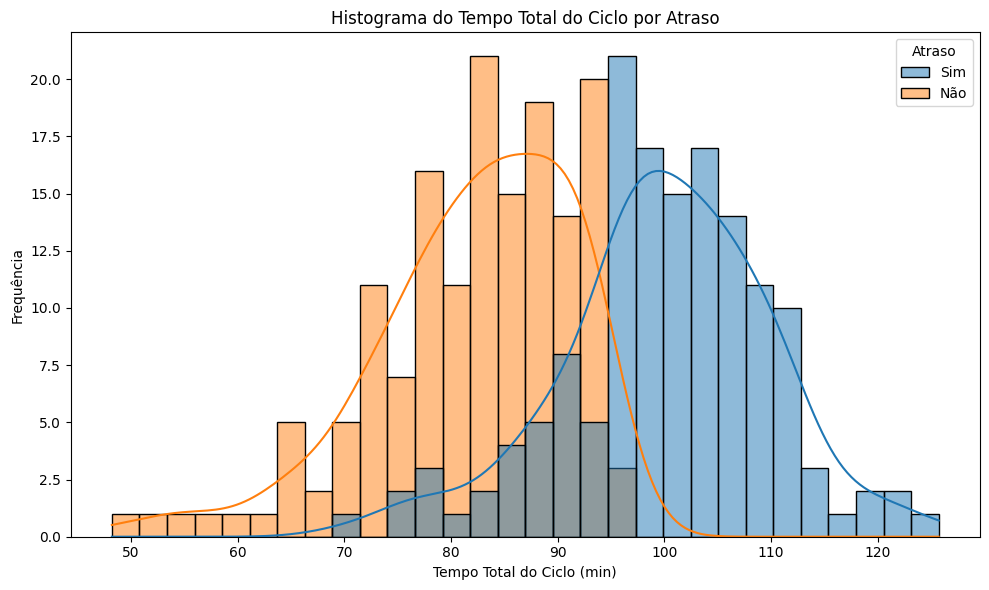

/tmp/ipython-input-2-3001514179.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




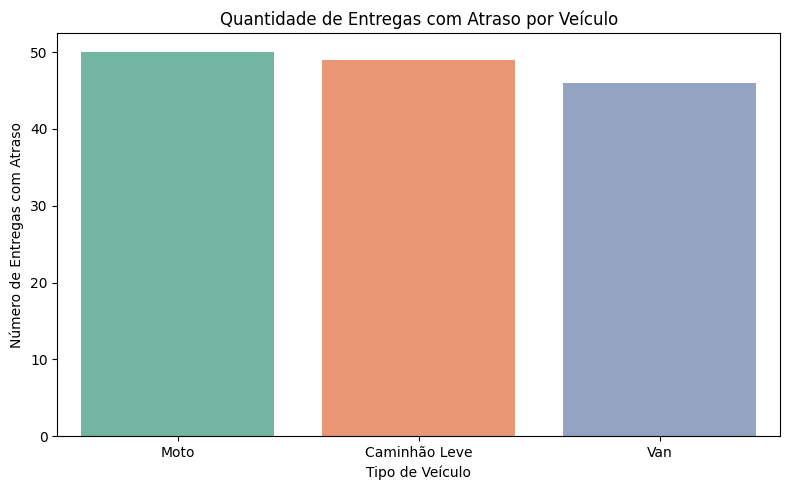

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Simulação de dados
np.random.seed(42)
num_registros = 300
veiculos = ['Caminhão Leve', 'Van', 'Moto']
causas_atraso = ['Trânsito', 'Erro de Rota', 'Problema Técnico', 'Clima', 'Nenhuma']

dados = {
    'ID_Entrega': range(1, num_registros + 1),
    'Veiculo': np.random.choice(veiculos, num_registros),
    'Tempo_Separacao': np.random.normal(loc=25, scale=5, size=num_registros).round(1),
    'Tempo_Carregamento': np.random.normal(loc=15, scale=4, size=num_registros).round(1),
    'Tempo_Entrega': np.random.normal(loc=45, scale=10, size=num_registros).round(1),
    'Tempo_Parado': np.random.exponential(scale=5, size=num_registros).round(1),
    'Entregas_na_Rota': np.random.randint(1, 11, size=num_registros),
}

df = pd.DataFrame(dados)
df['Tempo_Total_Ciclo'] = df['Tempo_Separacao'] + df['Tempo_Carregamento'] + df['Tempo_Entrega'] + df['Tempo_Parado']
df['Atraso'] = df.apply(lambda x: 'Sim' if x['Tempo_Parado'] > 7 or x['Tempo_Total_Ciclo'] > 95 else 'Não', axis=1)
df['Causa_Atraso'] = df['Atraso'].apply(lambda x: np.random.choice(causas_atraso[:-1]) if x == 'Sim' else 'Nenhuma')
df['Reentrega'] = df.apply(lambda x: 'Sim' if x['Atraso'] == 'Sim' and x['Entregas_na_Rota'] > 5 else 'Não', axis=1)

# Exibir os primeiros dados
print(df.head())

# -----------------------------------------------
# 📊 Gráfico de dispersão com Plotly
scatter = px.scatter(
    df,
    x='Tempo_Total_Ciclo',
    y='Tempo_Parado',
    color='Veiculo',
    size='Entregas_na_Rota',
    hover_data=['Atraso', 'Reentrega'],
    title='Dispersão: Tempo Total do Ciclo vs Tempo Parado'
)
scatter.show()

# -----------------------------------------------
# 📉 Histograma com Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tempo_Total_Ciclo', hue='Atraso', kde=True, bins=30)
plt.title('Histograma do Tempo Total do Ciclo por Atraso')
plt.xlabel('Tempo Total do Ciclo (min)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 📊 Gráfico de barras: Atrasos por Veículo
plt.figure(figsize=(8, 5))
sns.countplot(data=df[df['Atraso'] == 'Sim'], x='Veiculo', palette='Set2')
plt.title('Quantidade de Entregas com Atraso por Veículo')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Número de Entregas com Atraso')
plt.tight_layout()
plt.show()
